### Import du fichier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/fichier_python/submissions.csv',on_bad_lines="skip",delimiter=";")

### INFOS

In [ ]:
df

,iid_pid,iid,id,gender,idg,condtn,partner,pid,int_corr,samerace,...,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1
0,6805,509,1.0,0,1,2,1,531,"-0,12",1,...,7.0,7.0,6.0,NaN,10.0,20.0,30.0,10.0,10.0,20.0
1,6806,509,1.0,0,1,2,2,532,"0,03",1,...,7.0,7.0,6.0,NaN,10.0,20.0,30.0,10.0,10.0,20.0
2,6807,509,1.0,0,1,2,3,533,"0,37",0,...,7.0,7.0,6.0,NaN,10.0,20.0,30.0,10.0,10.0,20.0
3,6808,509,1.0,0,1,2,4,534,"0,11",0,...,7.0,7.0,6.0,NaN,10.0,20.0,30.0,10.0,10.0,20.0
4,6809,509,1.0,0,1,2,5,535,"0,39",0,...,7.0,7.0,6.0,NaN,10.0,20.0,30.0,10.0,10.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1569,8374,465,6.0,1,12,1,2,455,"0,41",0,...,1.0,1.0,4.0,NaN,20.0,20.0,20.0,20.0,20.0,0.0
1570,8375,465,6.0,1,12,1,3,456,"-0,02",0,...,1.0,1.0,4.0,NaN,20.0,20.0,20.0,20.0,20.0,0.0
1571,8376,465,6.0,1,12,1,4,457,"0,61",0,...,1.0,1.0,4.0,NaN,20.0,20.0,20.0,20.0,20.0,0.0
1572,8377,465,6.0,1,12,1,5,458,"-0,42",0,...,1.0,1.0,4.0,NaN,20.0,20.0,20.0,20.0,20.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6804 entries, 0 to 6803
Data columns (total 70 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   iid_pid   6804 non-null   int64  
 1   iid       6804 non-null   int64  
 2   id        6804 non-null   int64  
 3   gender    6804 non-null   int64  
 4   idg       6804 non-null   int64  
 5   condtn    6804 non-null   int64  
 6   wave      6804 non-null   int64  
 7   round     6804 non-null   int64  
 8   position  6804 non-null   int64  
 9   positin1  4958 non-null   float64
 10  order     6804 non-null   int64  
 11  partner   6804 non-null   int64  
 12  pid       6794 non-null   float64
 13  match     6804 non-null   int64  
 14  int_corr  6646 non-null   object 
 15  samerace  6804 non-null   int64  
 16  age_o     6722 non-null   float64
 17  race_o    6731 non-null   float64
 18  pf_o_att  6715 non-null   object 
 19  pf_o_sin  6715 non-null   object 
 20  pf_o_int  6715 non-null   obje

### SUPPRESSION des colonnes superflues : 

celles liées aux id (iid_pid,iid,id,idg,pid,partner)

---

celles liées à la carrière/champ qui se répètent (career,career_c,field) : j'ai gardé juste field_cd

---

celles liées au numéro des places/stations (position,positin1)

---

suppression de from et zipcode




In [ ]:
df=df.drop(['iid','id','idg','pid','partner','career','career_c','field','zipcode','from','expnum','race','race_o','field_cd'],axis=1)

###On enlève les virgules + transtypage

In [ ]:
df['income']=df['income'].replace(",","",regex=True)

In [ ]:
df=df.replace(",",".",regex=True)

In [ ]:
col=df.select_dtypes(include=['object']).columns
df[col]=df[col].astype(float)

###One hot encoding sur var qualitatives

---

c'est à dire : field_cd,race,race_o

---

Au final tout est en commentaire car nous avons choisi de simplement supprimer les différentes var qualitatives. Nous avons déjà beaucoup de variables à exploiter pour notre modèles, et après plusieurs tests, nous avons jugé qu'un one hot encoding rajoutait beaucoup de colonnes superflues

In [ ]:
#field=pd.get_dummies(df['field_cd'])

In [ ]:
#field.columns = ['Law','Math','Psychologist','Medical','Engineering','Journalism','History','Business','Education','Biologie','Social','Undergrad','Politics','Film','Arts','Languages','Architecture']

In [ ]:
#race=pd.get_dummies(df['race'])

In [ ]:
#race.columns = ['Black','European','Latino','Asian','other']

In [ ]:
#race_o=pd.get_dummies(df['race_o'])

In [ ]:
#race_o.columns = ['Black','European','Latino','Asian','other']

In [ ]:
#df=df.drop(['field_cd','race','race_o'],axis=1)

In [ ]:
#df=pd.concat([df,field,race,race_o],axis=1)

In [ ]:
#df

### Imputation des valeurs manquantes

---

utilisation d'un KNNImputer

In [ ]:
import numpy as np
from sklearn.impute import KNNImputer

In [ ]:
pd.set_option('display.max_rows',None)
df.isna().sum()

iid_pid       0
gender        0
condtn        0
int_corr      0
samerace      0
age_o        22
pf_o_att      0
pf_o_sin      0
pf_o_int      0
pf_o_fun      0
pf_o_amb      0
pf_o_sha     22
attr_o       71
sinc_o       80
intel_o      77
fun_o        83
amb_o       141
shar_o      153
age          22
imprace       0
imprelig      0
income      851
goal          0
date          0
go_out        0
sports       15
tvsports     15
exercise     15
dining       15
museums      15
art          15
hiking       15
gaming       15
clubbing     15
reading      15
tv           15
theater      15
movies       15
concerts     15
music        15
shopping     15
yoga         15
exphappy     37
attr1_1      15
sinc1_1      15
intel1_1     15
fun1_1       15
amb1_1       15
shar1_1      37
dtype: int64

In [ ]:
id=df['iid_pid']
df=df.drop(['iid_pid'],axis=1)
df

,gender,condtn,int_corr,samerace,age_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,...,music,shopping,yoga,exphappy,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1
0,0,2,-0.12,1,25.0,15,30,20,20,10,...,7.0,7.0,7.0,6.0,10.0,20.0,30.0,10.0,10.0,20.0
1,0,2,0.03,1,26.0,25,20,20,20,5,...,7.0,7.0,7.0,6.0,10.0,20.0,30.0,10.0,10.0,20.0
2,0,2,0.37,0,26.0,25,25,25,13,12,...,7.0,7.0,7.0,6.0,10.0,20.0,30.0,10.0,10.0,20.0
3,0,2,0.11,0,24.0,30,30,30,5,2,...,7.0,7.0,7.0,6.0,10.0,20.0,30.0,10.0,10.0,20.0
4,0,2,0.39,0,23.0,23,14,19,16,10,...,7.0,7.0,7.0,6.0,10.0,20.0,30.0,10.0,10.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1569,1,1,0.41,0,24.0,10,25,20,16,20,...,10.0,1.0,1.0,4.0,20.0,20.0,20.0,20.0,20.0,0.0
1570,1,1,-0.02,0,29.0,25,20,15,10,15,...,10.0,1.0,1.0,4.0,20.0,20.0,20.0,20.0,20.0,0.0
1571,1,1,0.61,0,55.0,25,0,25,25,0,...,10.0,1.0,1.0,4.0,20.0,20.0,20.0,20.0,20.0,0.0
1572,1,1,-0.42,0,29.0,50,5,25,20,0,...,10.0,1.0,1.0,4.0,20.0,20.0,20.0,20.0,20.0,0.0


In [ ]:
imputer = KNNImputer(n_neighbors=10, weights="distance")
df = pd.DataFrame(imputer.fit_transform(df), columns = df.columns)

In [ ]:
pd.set_option('display.max_rows',None)
df.isna().sum()

gender      0
condtn      0
int_corr    0
samerace    0
age_o       0
pf_o_att    0
pf_o_sin    0
pf_o_int    0
pf_o_fun    0
pf_o_amb    0
pf_o_sha    0
attr_o      0
sinc_o      0
intel_o     0
fun_o       0
amb_o       0
shar_o      0
age         0
imprace     0
imprelig    0
income      0
goal        0
date        0
go_out      0
sports      0
tvsports    0
exercise    0
dining      0
museums     0
art         0
hiking      0
gaming      0
clubbing    0
reading     0
tv          0
theater     0
movies      0
concerts    0
music       0
shopping    0
yoga        0
exphappy    0
attr1_1     0
sinc1_1     0
intel1_1    0
fun1_1      0
amb1_1      0
shar1_1     0
dtype: int64

In [ ]:
XTestsubmit=pd.concat([id,df],axis=1)

In [ ]:
XTestsubmit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1574 entries, 0 to 1573
Data columns (total 49 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   iid_pid   1574 non-null   int64  
 1   gender    1574 non-null   float64
 2   condtn    1574 non-null   float64
 3   int_corr  1574 non-null   float64
 4   samerace  1574 non-null   float64
 5   age_o     1574 non-null   float64
 6   pf_o_att  1574 non-null   float64
 7   pf_o_sin  1574 non-null   float64
 8   pf_o_int  1574 non-null   float64
 9   pf_o_fun  1574 non-null   float64
 10  pf_o_amb  1574 non-null   float64
 11  pf_o_sha  1574 non-null   float64
 12  attr_o    1574 non-null   float64
 13  sinc_o    1574 non-null   float64
 14  intel_o   1574 non-null   float64
 15  fun_o     1574 non-null   float64
 16  amb_o     1574 non-null   float64
 17  shar_o    1574 non-null   float64
 18  age       1574 non-null   float64
 19  imprace   1574 non-null   float64
 20  imprelig  1574 non-null   floa

### Exportation des données

In [ ]:
df_clean_new=df

In [ ]:
df_clean_new.to_csv("submission_clean.csv",index=False,header=True,sep=',')

### Machine learning

### séparation xtrain xtest

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/fichier_python/df_clean_new.csv',on_bad_lines="skip",delimiter=",")

In [ ]:
pd.set_option('display.max_columns',None)

df.head()

,gender,condtn,wave,round,order,match,int_corr,samerace,age_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,age,imprace,imprelig,income,goal,date,go_out,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1
0,1.0,2.0,17.0,11.0,1.0,0.0,0.48,0.0,29.0,20.0,10.0,50.0,5.0,10.0,5.0,0.0,3.0,10.000000,10.000000,3.000000,10.000000,0.000000,27.0,4.0,3.0,43982.229421,2.0,6.0,5.0,6.0,3.0,5.0,6.0,6.0,5.0,6.0,5.0,3.0,6.0,6.0,4.0,7.0,6.0,5.0,4.0,1.0,6.0,30.0,30.0,30.0,5.0,0.0,5.0
1,1.0,2.0,17.0,11.0,10.0,0.0,0.31,0.0,23.0,14.0,15.0,16.0,17.0,18.0,20.0,0.0,3.0,9.000000,10.000000,3.000000,10.000000,2.000000,27.0,4.0,3.0,42575.234878,2.0,6.0,5.0,6.0,3.0,5.0,6.0,6.0,5.0,6.0,5.0,3.0,6.0,6.0,4.0,7.0,6.0,5.0,4.0,1.0,6.0,30.0,30.0,30.0,5.0,0.0,5.0
2,1.0,2.0,17.0,11.0,9.0,0.0,0.40,0.0,23.0,15.0,15.0,18.0,18.0,14.0,20.0,0.0,6.0,8.000000,10.000000,6.000000,9.000000,5.000000,27.0,4.0,3.0,44255.793221,2.0,6.0,5.0,6.0,3.0,5.0,6.0,6.0,5.0,6.0,5.0,3.0,6.0,6.0,4.0,7.0,6.0,5.0,4.0,1.0,6.0,30.0,30.0,30.0,5.0,0.0,5.0
3,1.0,2.0,17.0,11.0,4.0,0.0,0.59,0.0,23.0,28.0,8.0,17.0,22.0,17.0,8.0,0.0,7.0,10.000000,8.000000,8.000000,8.000000,7.000000,27.0,4.0,3.0,45979.064511,2.0,6.0,5.0,6.0,3.0,5.0,6.0,6.0,5.0,6.0,5.0,3.0,6.0,6.0,4.0,7.0,6.0,5.0,4.0,1.0,6.0,30.0,30.0,30.0,5.0,0.0,5.0
4,1.0,2.0,17.0,11.0,5.0,0.0,-0.17,0.0,22.0,25.0,5.0,20.0,25.0,15.0,10.0,0.0,2.0,7.746098,7.616959,5.483463,6.672365,3.897734,27.0,4.0,3.0,41369.285153,2.0,6.0,5.0,6.0,3.0,5.0,6.0,6.0,5.0,6.0,5.0,3.0,6.0,6.0,4.0,7.0,6.0,5.0,4.0,1.0,6.0,30.0,30.0,30.0,5.0,0.0,5.0


In [ ]:
Y = df['match']
X = df.drop(['match','wave','round','order','dec_o'], 1)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


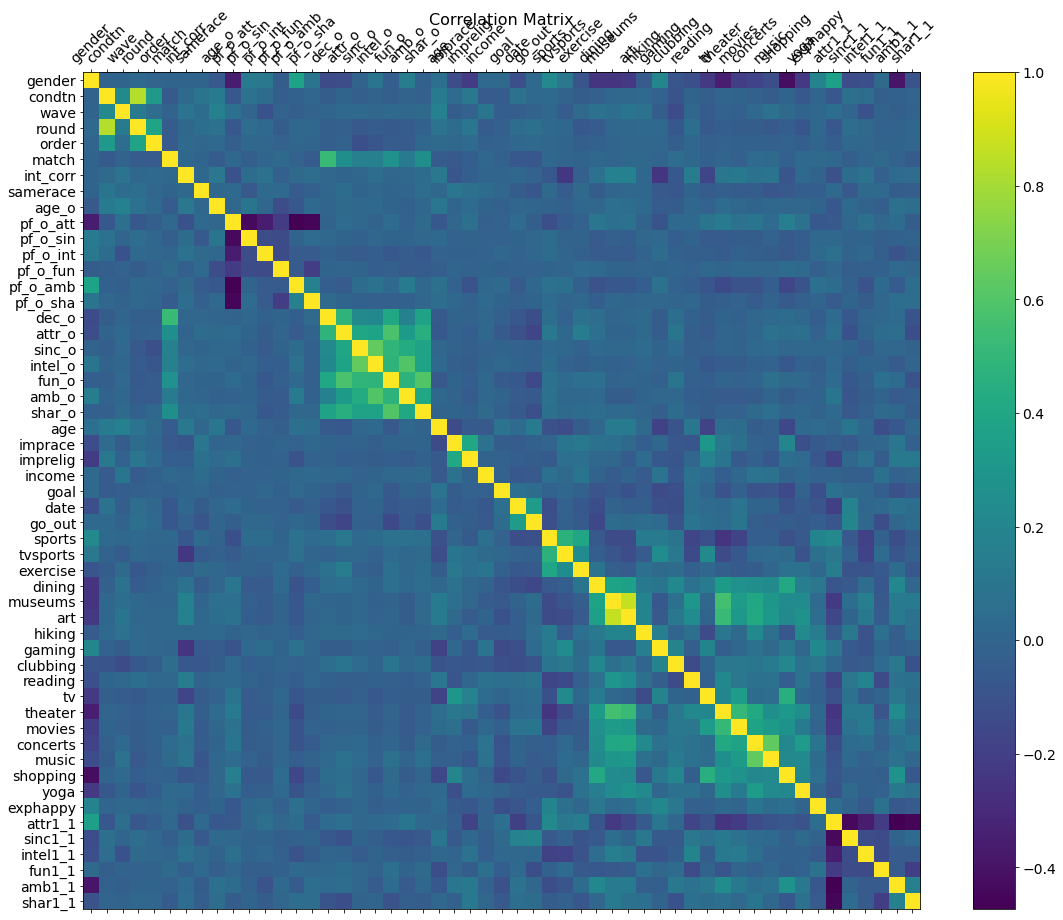

In [ ]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.30, stratify = Y)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

### SMOTE

---

Afin de rééquilibrer les données

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split


In [ ]:
#sm = SMOTE(random_state=2)
X, y = SMOTE().fit_resample(X_train, y_train)
#X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [ ]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X_res,Y_res, test_size = 0.30, stratify = Y_res)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)

### Tests sur différents modèles

### Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
Adaclfstd = AdaBoostClassifier( n_estimators=250)
Adaclfstd.fit(X_train_scale, y_train)

AdaBoostClassifier(n_estimators=250)

In [ ]:
y_pred = Adaclfstd.predict(X_test_scale)

In [ ]:
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, f1_score, recall_score, precision_score, make_scorer, roc_curve, auc
print(accuracy_score(y_test,y_pred))
print('f1_score : ' + str(f1_score(y_test,y_pred, average='macro')))

0.83692458374143
f1_score : 0.617244611059044


Non Std :

In [ ]:
Adaclf = AdaBoostClassifier( n_estimators=250)
Adaclf.fit(X_train, y_train)
y_predNonStd = Adaclf.predict(X_test)
print(accuracy_score(y_test,y_predNonStd))
print('f1_score : ' + str(f1_score(y_test,y_predNonStd, average='macro')))

0.83692458374143
f1_score : 0.617244611059044


### Selection de variables

In [ ]:
importances = Adaclfstd.feature_importances_

In [ ]:
import matplotlib.pyplot as plt

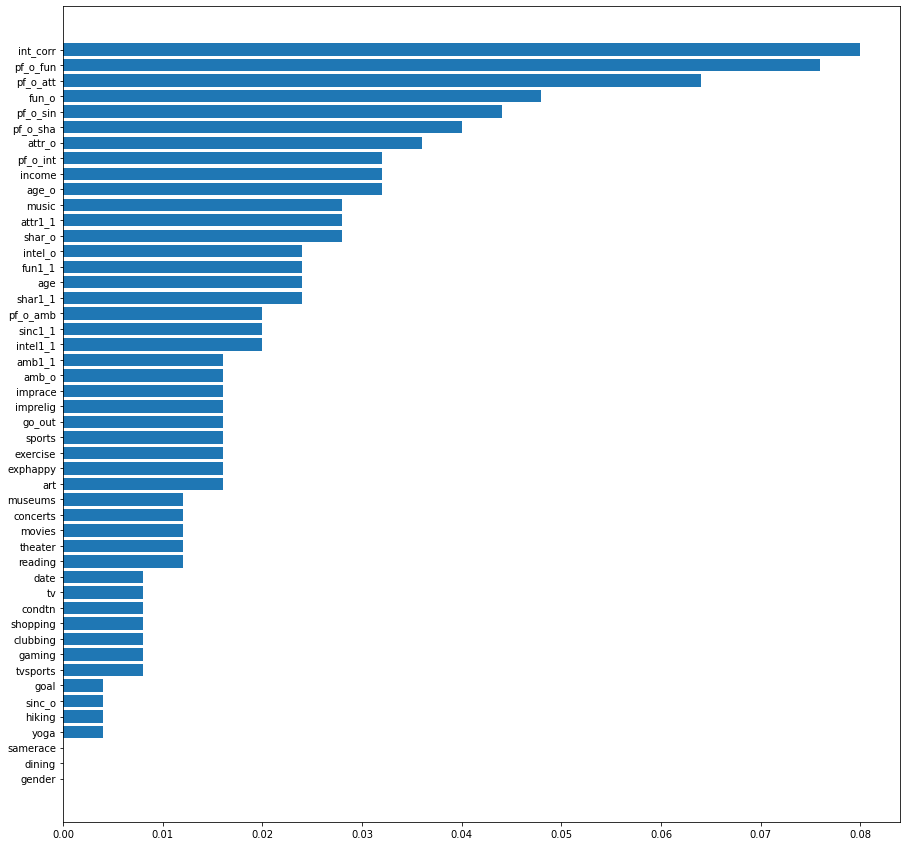

In [ ]:
indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=(15, 15))
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])

In [ ]:
(X_train.columns)[indices]

Index(['gender', 'dining', 'samerace', 'yoga', 'hiking', 'sinc_o', 'goal',
       'tvsports', 'gaming', 'clubbing', 'shopping', 'condtn', 'tv', 'date',
       'reading', 'theater', 'movies', 'concerts', 'museums', 'art',
       'exphappy', 'exercise', 'sports', 'go_out', 'imprelig', 'imprace',
       'amb_o', 'amb1_1', 'intel1_1', 'sinc1_1', 'pf_o_amb', 'shar1_1', 'age',
       'fun1_1', 'intel_o', 'shar_o', 'attr1_1', 'music', 'age_o', 'income',
       'pf_o_int', 'attr_o', 'pf_o_sha', 'pf_o_sin', 'fun_o', 'pf_o_att',
       'pf_o_fun', 'int_corr'],
      dtype='object')

In [ ]:
col=X_train.columns[indices][-25:]

In [ ]:
X_train_sel=X_train[col]

scaler = StandardScaler().fit(X_train_sel)
X_train_sel_std = scaler.transform(X_train_sel)

In [ ]:
X_train_sel_std

array([[-1.03818875, -0.2678646 ,  1.11296096, ..., -0.44849567,
        -0.11594128,  0.15981183],
       [ 0.78842821,  0.43541469,  1.11296096, ..., -0.18605241,
         0.42400698,  0.35790058],
       [ 0.78842821,  1.13869399,  1.80819965, ...,  0.20800656,
         0.42400698, -1.45791298],
       ...,
       [-0.12488027, -0.9711439 , -0.97275513, ..., -0.86698629,
         0.12890012, -0.43445442],
       [ 1.70173669,  0.78705434, -0.97275513, ..., -0.97417033,
         0.42400698,  0.88613726],
       [ 1.70173669,  1.13869399,  1.4605803 , ..., -0.97417033,
         0.42400698,  0.39091538]])

### Adaboost avec selection de var

In [ ]:
Adaclfstd = AdaBoostClassifier(n_estimators=300)
Adaclfstd.fit(X_train_sel_std, y_train)

AdaBoostClassifier(n_estimators=300)

In [ ]:
X_test_sel=X_test[col]
X_test_sel_std = scaler.transform(X_test_sel)

In [ ]:
y_pred_sel = Adaclfstd.predict(X_test_sel_std)

In [ ]:
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, f1_score, recall_score, precision_score, make_scorer, roc_curve, auc
print(accuracy_score(y_test,y_pred_sel))
print('f1_score : ' + str(f1_score(y_test,y_pred_sel, average='macro')))

0.8330068560235063
f1_score : 0.6039022614344509


### Optimisation adaboost

In [ ]:
parameters = {'n_estimators' : np.arange(start = 250, stop = 351, step = 50),
              'learning_rate' : np.arange(start = 0.2, stop = 1.2, step = 0.2),
              'algorithm' : ['SAMME', 'SAMME.R']
             }

In [ ]:
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import GridSearchCV

AdaclfstdGS = AdaBoostClassifier()
f1 = make_scorer(f1_score , average='macro')
AdaclfstdGS = GridSearchCV(AdaclfstdGS,
                                  parameters,
                                  scoring = f1,
                                  verbose = 2, 
                                  cv = 5)
AdaclfstdGS.fit(X_train_sel_std, y_train)

In [ ]:
print("Voici les paramètres du meilleure modèle : " + str(AdaclfstdGS.best_estimator_))
print("Voici le "  + str(AdaclfstdGS.scorer_) + " du meilleure modèle : " + str(AdaclfstdGS.best_score_))
y_pred_sel_opt = AdaclfstdGS.predict(X_test_sel_std)
print('f1_score : ' + str(f1_score(y_test,y_pred_sel_opt, average='macro')))

Voici les paramètres du meilleure modèle : AdaBoostClassifier(n_estimators=350)
Voici le make_scorer(f1_score, average=macro) du meilleure modèle : 0.6095423264112735
f1_score : 0.6029572899438874


### Gradient boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]
mf_list = [3,5,10,20,50,100,250]
for learning_rate in mf_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=1, max_features=5, max_depth=20, random_state=0)
    gb_clf.fit(X_train_scale, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train_scale, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test_scale, y_test)))

Learning rate:  3
Accuracy score (training): 1.000
Accuracy score (validation): 0.826
Learning rate:  5
Accuracy score (training): 1.000
Accuracy score (validation): 0.826
Learning rate:  10
Accuracy score (training): 1.000
Accuracy score (validation): 0.826
Learning rate:  20
Accuracy score (training): 1.000
Accuracy score (validation): 0.826
Learning rate:  50
Accuracy score (training): 1.000
Accuracy score (validation): 0.826
Learning rate:  100
Accuracy score (training): 1.000
Accuracy score (validation): 0.826
Learning rate:  250
Accuracy score (training): 1.000
Accuracy score (validation): 0.826


In [ ]:
gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=20, max_depth=50, random_state=0)
gb_clf.fit(X_train_scale, y_train)
y_pred = gb_clf.predict(X_test_scale)

In [ ]:
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, f1_score, recall_score, precision_score, make_scorer, roc_curve, auc
print(accuracy_score(y_test,y_pred))
print('f1_score : ' + str(f1_score(y_test,y_pred, average='macro')))

0.767384916748286
f1_score : 0.5937448561049683


### optimisation paramètres

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters = {
    "loss":["deviance"],
    "learning_rate": [0.5, 0.75, 1],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.618, 0.8,  0.9, 1.0],
    "n_estimators":[10]
    }

clf = GridSearchCV(GradientBoostingClassifier(), parameters, cv=10, n_jobs=-1)

In [ ]:
parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

In [ ]:
p_test3 = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 'n_estimators':[100,250,500,750,1000,1250,1500,1750]}

In [ ]:
tuning = GridSearchCV(estimator =GradientBoostingClassifier(max_depth=4, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = p_test3, scoring='accuracy',n_jobs=4, cv=5)
tuning.fit(X_train_scale,y_train)
#tuning.grid_scores_, tuning.best_params_, tuning.best_score_

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(max_depth=4,
                                                  max_features='sqrt',
                                                  random_state=10,
                                                  subsample=1),
             n_jobs=4,
             param_grid={'learning_rate': [0.15, 0.1, 0.05, 0.01, 0.005, 0.001],
                         'n_estimators': [100, 250, 500, 750, 1000, 1250, 1500,
                                          1750]},
             scoring='accuracy')

In [ ]:
print("Voici les paramètres du meilleure modèle : " + str(tuning.best_estimator_))
print("Voici le "  + str(tuning.scorer_) + " du meilleure modèle : " + str(tuning.best_score_))
y_pred = tuning.predict(X_test_scale)
print('f1_score : ' + str(f1_score(y_test,y_pred, average='macro')))

Voici les paramètres du meilleure modèle : GradientBoostingClassifier(learning_rate=0.01, max_depth=4, max_features='sqrt',
                           n_estimators=1000, random_state=10, subsample=1)
Voici le make_scorer(accuracy_score) du meilleure modèle : 0.8385139365294911
f1_score : 0.5682503386870689


In [ ]:
cv = GridSearchCV(gb_clf,parameters,cv=5)
cv.fit(X_train, y_train)

In [ ]:
clf.fit(X_train, y_train)

LGBMClassifier(metric='None', n_estimators=5000, n_jobs=4, random_state=314)

### selection var pour gradient boosting

In [ ]:
importances = gb_clf.feature_importances_

In [ ]:
import matplotlib.pyplot as plt

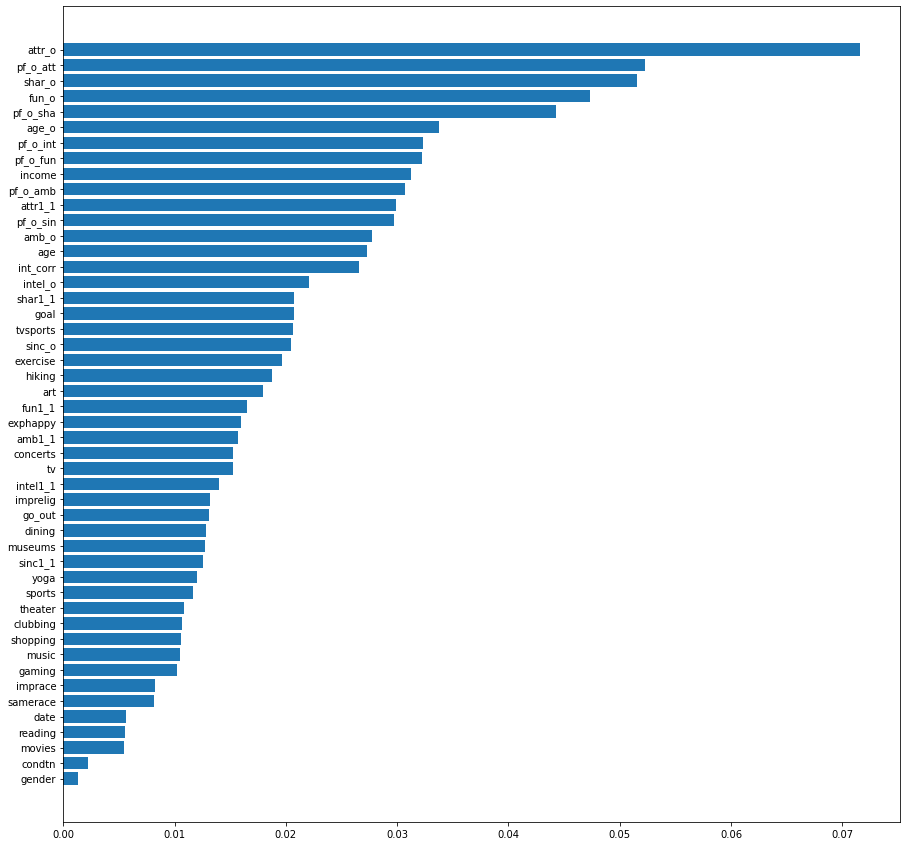

In [ ]:
indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=(15, 15))
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])

In [ ]:
col=X_train.columns[indices][-25:]


In [ ]:
X_train_sel=X_train[col]

scaler = StandardScaler().fit(X_train_sel)
X_train_sel_std = scaler.transform(X_train_sel)

X_test_sel=X_test[col]
X_test_sel_std = scaler.transform(X_test_sel)

In [ ]:
X_train_sel=X_train[col]
X_test_sel=X_test[col]

### gradient boosting avec sel var

In [ ]:
lr_list = [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]

for learning_rate in lr_list:
    gb_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=8, random_state=0)
    gb_clf.fit(X_train_sel_std, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb_clf.score(X_train_sel_std, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb_clf.score(X_test_sel_std, y_test)))

Learning rate:  0.05
Accuracy score (training): 0.840
Accuracy score (validation): 0.832
Learning rate:  0.075
Accuracy score (training): 0.860
Accuracy score (validation): 0.836
Learning rate:  0.1
Accuracy score (training): 0.882
Accuracy score (validation): 0.836
Learning rate:  0.25
Accuracy score (training): 0.953
Accuracy score (validation): 0.834
Learning rate:  0.5
Accuracy score (training): 0.988
Accuracy score (validation): 0.817
Learning rate:  0.75
Accuracy score (training): 0.998
Accuracy score (validation): 0.809
Learning rate:  1
Accuracy score (training): 1.000
Accuracy score (validation): 0.800


In [ ]:
gb_clf_sel = GradientBoostingClassifier(n_estimators=20, learning_rate=0.75, max_features=5, max_depth=250, random_state=0)
gb_clf_sel.fit(X_train_sel_std, y_train)
y_pred = gb_clf.predict(X_test_sel_std)

In [ ]:
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, f1_score, recall_score, precision_score, make_scorer, roc_curve, auc
print(accuracy_score(y_test,y_pred))
print('f1_score : ' + str(f1_score(y_test,y_pred, average='macro')))

0.8001958863858962
f1_score : 0.5864796450162304


In [ ]:
0.8300685602350637
f1_score : 0.5725144325412554

### XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb_classifier = XGBClassifier()

In [ ]:
xgb_classifier.fit(X_train_scale,y_train)

XGBClassifier()

In [ ]:
y_pred = xgb_classifier.predict(X_test_scale)

In [ ]:
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, f1_score, recall_score, precision_score, make_scorer, roc_curve, auc
print(accuracy_score(y_test,y_pred))
print('f1_score : ' + str(f1_score(y_test,y_pred, average='macro')))

0.8379040156709109
f1_score : 0.5403012279681565


### LightGBM

In [ ]:
import lightgbm

In [ ]:
print(lightgbm.__version__)

2.2.3


In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [ ]:
model = LGBMClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train_scale, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.840 (0.011)


In [ ]:
model = LGBMClassifier()
model.fit(X_train_scale, y_train)

LGBMClassifier()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, f1_score, recall_score, precision_score, make_scorer, roc_curve, auc
print(accuracy_score(y_test,y_pred))
print('f1_score : ' + str(f1_score(y_test,y_pred, average='macro')))

0.8315377081292851
f1_score : 0.4540106951871658


### Selection var lightGBM

In [ ]:
importances = model.feature_importances_

In [ ]:
import matplotlib.pyplot as plt

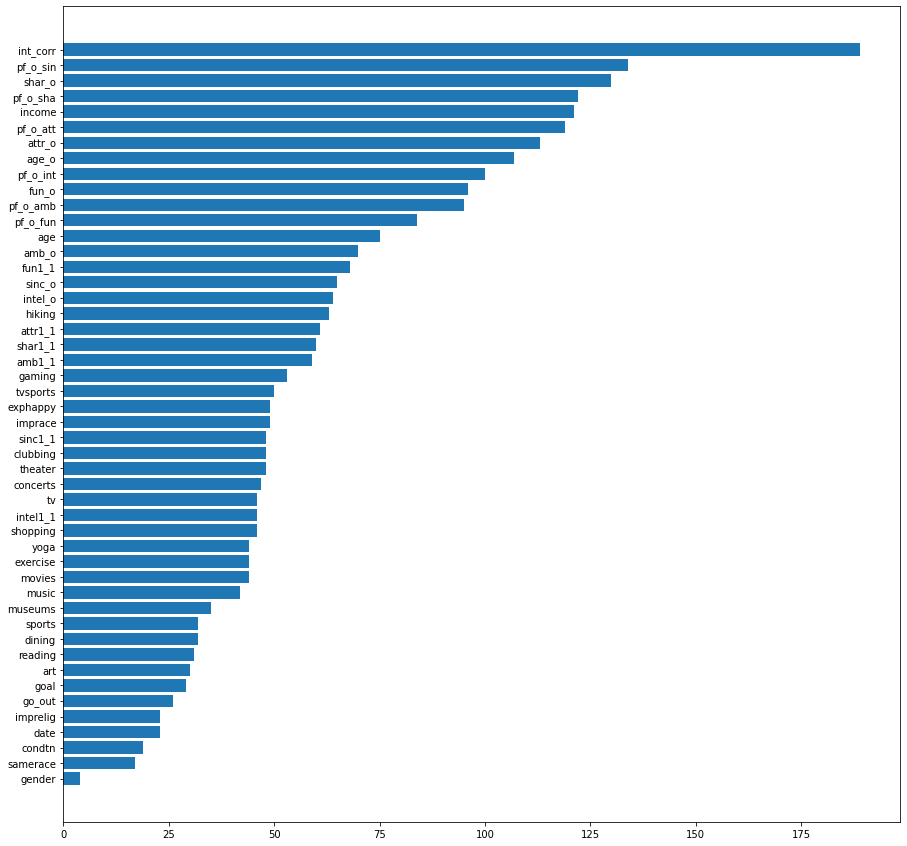

In [ ]:
indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=(15, 15))
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])

In [ ]:
col=X_train.columns[indices][-20:]


In [ ]:
X_train_sel=X_train[col]

scaler = StandardScaler().fit(X_train_sel)
X_train_sel_std = scaler.transform(X_train_sel)

X_test_sel=X_test[col]
X_test_sel_std = scaler.transform(X_test_sel)

optimisation

In [ ]:
def learning_rate_010_decay_power_099(current_iter):
    base_learning_rate = 0.1
    lr = base_learning_rate  * np.power(.99, current_iter)
    return lr if lr > 1e-3 else 1e-3

def learning_rate_010_decay_power_0995(current_iter):
    base_learning_rate = 0.1
    lr = base_learning_rate  * np.power(.995, current_iter)
    return lr if lr > 1e-3 else 1e-3

def learning_rate_005_decay_power_099(current_iter):
    base_learning_rate = 0.05
    lr = base_learning_rate  * np.power(.99, current_iter)
    return lr if lr > 1e-3 else 1e-3

In [ ]:
import lightgbm as lgb
fit_params={"early_stopping_rounds":30, 
            "eval_metric" : 'auc', 
            "eval_set" : [(X_test,y_test)],
            'eval_names': ['valid'],
            #'callbacks': [lgb.reset_parameter(learning_rate=learning_rate_010_decay_power_099)],
            'verbose': 100,
            'categorical_feature': 'auto'}

In [ ]:
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
param_test ={'num_leaves': sp_randint(6, 50), 
             'min_child_samples': sp_randint(100, 500), 
             'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
             'subsample': sp_uniform(loc=0.2, scale=0.8), 
             'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
             'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

In [ ]:
#This parameter defines the number of HP points to be tested
n_HP_points_to_test = 100
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [ ]:
clf = lgb.LGBMClassifier(max_depth=-1, random_state=314, silent=True, metric='None', n_jobs=4, n_estimators=5000)
gs = RandomizedSearchCV(
    estimator=clf, param_distributions=param_test, 
    n_iter=n_HP_points_to_test,
    scoring='roc_auc',
    cv=3,
    refit=True,
    random_state=314,
    verbose=True)

In [ ]:
gs.fit(X_train_scale, y_train, **fit_params)
print('Best score reached: {} with params: {} '.format(gs.best_score_, gs.best_params_))

In [ ]:
{'colsample_bytree': 0.7916380440478592, 'min_child_samples': 211, 'min_child_weight': 1, 'num_leaves': 45, 'reg_alpha': 2, 'reg_lambda': 20, 'subsample': 0.5211522776637936} 

{'colsample_bytree': 0.7916380440478592,
 'min_child_samples': 211,
 'min_child_weight': 1,
 'num_leaves': 45,
 'reg_alpha': 2,
 'reg_lambda': 20,
 'subsample': 0.5211522776637936}

In [ ]:
clf_sw = lgb.LGBMClassifier(**clf.get_params())
#set optimal parameters
clf_sw.set_params(**opt_parameters)

clf_sw.fit(X_train_scale, y_train, **fit_params, callbacks=[lgb.reset_parameter(learning_rate=learning_rate_010_decay_power_0995)])

Training until validation scores don't improve for 30 rounds.
Early stopping, best iteration is:
[64]	valid's auc: 0.508183


LGBMClassifier(colsample_bytree=0.952164731370897, metric='None',
               min_child_samples=111, min_child_weight=0.01, n_estimators=5000,
               n_jobs=4, num_leaves=38, random_state=314, reg_alpha=0,
               reg_lambda=0.1, subsample=0.3029313662262354)

In [ ]:
y_pred = clf_sw.predict(X_test_scale)

In [ ]:
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, f1_score, recall_score, precision_score, make_scorer, roc_curve, auc
print(accuracy_score(y_test,y_pred))
print('f1_score : ' + str(f1_score(y_test,y_pred, average='macro')))

0.8442703232125367
f1_score : 0.6029132269308384


In [ ]:
feat_imp = pd.Series(clf_sw.feature_importances_, index=application_train_ohe.drop(['SK_ID_CURR', 'TARGET'], axis=1).columns)
feat_imp.nlargest(20).plot(kind='barh', figsize=(8,10))

### LightGBM avec selection var

In [ ]:
model = LGBMClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.842 (0.011)


In [ ]:
model = LGBMClassifier()
model.fit(X_train_sel_std, y_train)
y_pred = model.predict(X_test_sel_std)

In [ ]:
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, f1_score, recall_score, precision_score, make_scorer, roc_curve, auc
print(accuracy_score(y_test,y_pred))
print('f1_score : ' + str(f1_score(y_test,y_pred, average='macro')))

0.8349657198824681
f1_score : 0.5864148448651492


### Sur XTestsubmit

In [ ]:
id=XTestsubmit['iid_pid']
XTestsubmit=XTestsubmit.drop(['iid_pid'],axis=1)

In [ ]:
XTestsubmit_sel=XTestsubmit[col]
#XTestsubmit_sel=XTestsubmit

scaler = StandardScaler().fit(XTestsubmit_sel)
XTestsubmit_sel_std = scaler.transform(XTestsubmit_sel)

In [ ]:
XTestsubmit_sel_std

array([[-1.03328937,  1.73625298,  1.36115417,  1.90591881,  0.50229015],
       [-0.5423064 ,  0.51837923,  1.36115417, -0.14200076,  0.01129344],
       [ 0.57058835, -0.09055765,  0.42073233, -0.65398065,  0.01129344],
       ...,
       [ 1.3561611 , -1.3084314 ,  0.89094325,  1.90591881,  0.50229015],
       [-2.01525532, -2.52630516, -1.46011133, -1.16596055, -0.47970327],
       [ 0.17780197, -1.3084314 , -1.46011133, -0.65398065, -1.46169669]])

In [ ]:
#y_predsubmit = Adaclfstd.predict(XTestsubmit_sel_std)
#y_predsubmit = classifier.predict(XTestsubmit_sel_std)
y_predsubmit = gb_clf_sel.predict(XTestsubmit_sel_std)
#y_predsubmit = model.predict(XTestsubmit_sel_std)

In [ ]:
pd.set_option('display.max_rows',100)

In [ ]:
dataf=pd.DataFrame(y_predsubmit)

In [ ]:
dataf.value_counts()

0.0    1501
1.0      73
dtype: int64

In [ ]:
submit=pd.DataFrame({'iid_pid': id,'target':y_predsubmit},)

In [ ]:
submit.to_csv("to_submit.csv",index=False,header=True,sep=',')